In [1]:
import os
import json
from PIL import Image, ImageDraw
import re
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
import tifffile as tiff
from tqdm import tqdm
from skimage.exposure import equalize_adapthist
from scipy.stats import stats
import matplotlib.animation as animation
import pandas as pd
import csv
import shutil
from skimage.morphology import dilation, erosion

In [2]:
# import numpy as np
# import os

id_dict = np.load("/home/MinaHossain/DMNet_Rina/training_codes/data_trainlist/ids_allGT copy.npy", allow_pickle=True).item()
training = id_dict['train']
validation = id_dict['val']
#validation


In [3]:
os.chdir(r'/home/MinaHossain/DMNet_Rina/training_codes/Data/train/')
folder_name = 'Cell-Data-P2'
#folder_type = 'ST'
folder_num = ['01','02']

results = []

for tf in folder_num:
    im=os.path.join(folder_name, tf)
    if tf == '01':
        folder_type = 'ST'
    else:
        folder_type = 'GT'
    
    A = []
    #n_images = 748
    dir_path = im
    #dir_path = r'/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell_Data'
    #for i in range(n_images):
    count=0
    for i in os.listdir(dir_path):
        if os.path.isfile(os.path.join(dir_path, i)):
            # count += 1

            A.append(f'{folder_name}_{folder_type}_{tf}_{count:04d}')
            count += 1
        # count +=1
    results.append(A)

#print(A)
#results[1]
# print(type(results[0]))
# print(type(id_dict['train']))

training = np.concatenate((id_dict['train'] , np.array(results[0])),axis=0)
#training = np.vstack((id_dict['train'] , np.array(results[0])))
#validation = id_dict['val'] + np.array(results[1])
#print(training)
validation = np.concatenate((id_dict['val'] , np.array(results[1])),axis=0)



In [4]:
training

array(['BF-C2DL-HSC_GT_01_0108', 'BF-C2DL-HSC_GT_01_0126',
       'BF-C2DL-HSC_GT_01_0175', ..., 'Cell-Data-P2_ST_01_1298',
       'Cell-Data-P2_ST_01_1299', 'Cell-Data-P2_ST_01_1300'], dtype='<U29')

In [5]:
validation

array(['BF-C2DL-HSC_GT_01_0175', 'BF-C2DL-HSC_GT_01_0218',
       'BF-C2DL-HSC_GT_01_0347', 'BF-C2DL-HSC_GT_01_0868',
       'BF-C2DL-HSC_GT_01_0902', 'BF-C2DL-HSC_GT_01_0930',
       'BF-C2DL-HSC_GT_01_0932', 'BF-C2DL-HSC_GT_01_1219',
       'BF-C2DL-HSC_GT_01_1357', 'BF-C2DL-HSC_GT_01_1460',
       'BF-C2DL-HSC_GT_01_1468', 'BF-C2DL-HSC_GT_01_1476',
       'BF-C2DL-HSC_GT_01_1583', 'BF-C2DL-HSC_GT_01_1707',
       'BF-C2DL-HSC_GT_02_1748', 'BF-C2DL-MuSC_GT_01_0234',
       'BF-C2DL-MuSC_GT_01_0464', 'BF-C2DL-MuSC_GT_01_0992',
       'BF-C2DL-MuSC_GT_01_1103', 'BF-C2DL-MuSC_GT_01_1140',
       'BF-C2DL-MuSC_GT_01_1186', 'BF-C2DL-MuSC_GT_01_1196',
       'BF-C2DL-MuSC_GT_01_1200', 'BF-C2DL-MuSC_GT_01_1221',
       'BF-C2DL-MuSC_GT_01_1246', 'BF-C2DL-MuSC_GT_01_1254',
       'BF-C2DL-MuSC_GT_02_0121', 'BF-C2DL-MuSC_GT_02_0280',
       'BF-C2DL-MuSC_GT_02_0765', 'BF-C2DL-MuSC_GT_02_0826',
       'BF-C2DL-MuSC_GT_02_0854', 'BF-C2DL-MuSC_GT_02_1020',
       'BF-C2DL-MuSC_GT_02_1088', 'BF-C

In [ ]:
# obj = np.load("training_codes/data_trainlist/ids_allGT+ST.npy", allow_pickle=True).item()
# for i in obj['train']:
#     print(i)
# print("\n\n")
# for i in obj['val']:
#     print(i)

In [ ]:
# obj = np.load("training_codes/data_trainlist/ids_allST.npy", allow_pickle=True).item()
# for i in obj['train']:
#     print(i)
# print("\n\n")
# for i in obj['val']:
#     print(i)

In [ ]:
# test = {'train': training, 'val': validation}
# np.save('test.npy', test)

In [ ]:
# test = np.load('test_save.npy', allow_pickle=True)
# #test.item()
# validation

In [6]:
test = {'train': training, 'val': validation}
np.save('/home/MinaHossain/DMNet_Rina/training_codes/data_trainlist/ids_allGT.npy', test)

In [7]:
test = np.load('/home/MinaHossain/DMNet_Rina/training_codes/data_trainlist/ids_allGT.npy', allow_pickle=True)
test.item()
# print(test.item().keys())
# test.item()['val']
print(type(test.item()['train']))


<class 'numpy.ndarray'>


In [7]:
# arr_0 = ["a", "b"]
# arr_1 = ["c", "d"]

# list3 =  np.concatenate((arr_0, arr_1), axis=0)
# print(list3)
print(type(test.item()['train']))


<class 'numpy.ndarray'>


Data Augmentation:  Flipping Images

(4623, 2048)


/tmp/ipykernel_2331736/1497990673.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tmp_Flp_Y =imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-P2/01/t0175.tif")
/tmp/ipykernel_2331736/1497990673.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tmp_Flp_X_Y=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-P2/01/t0175.tif")


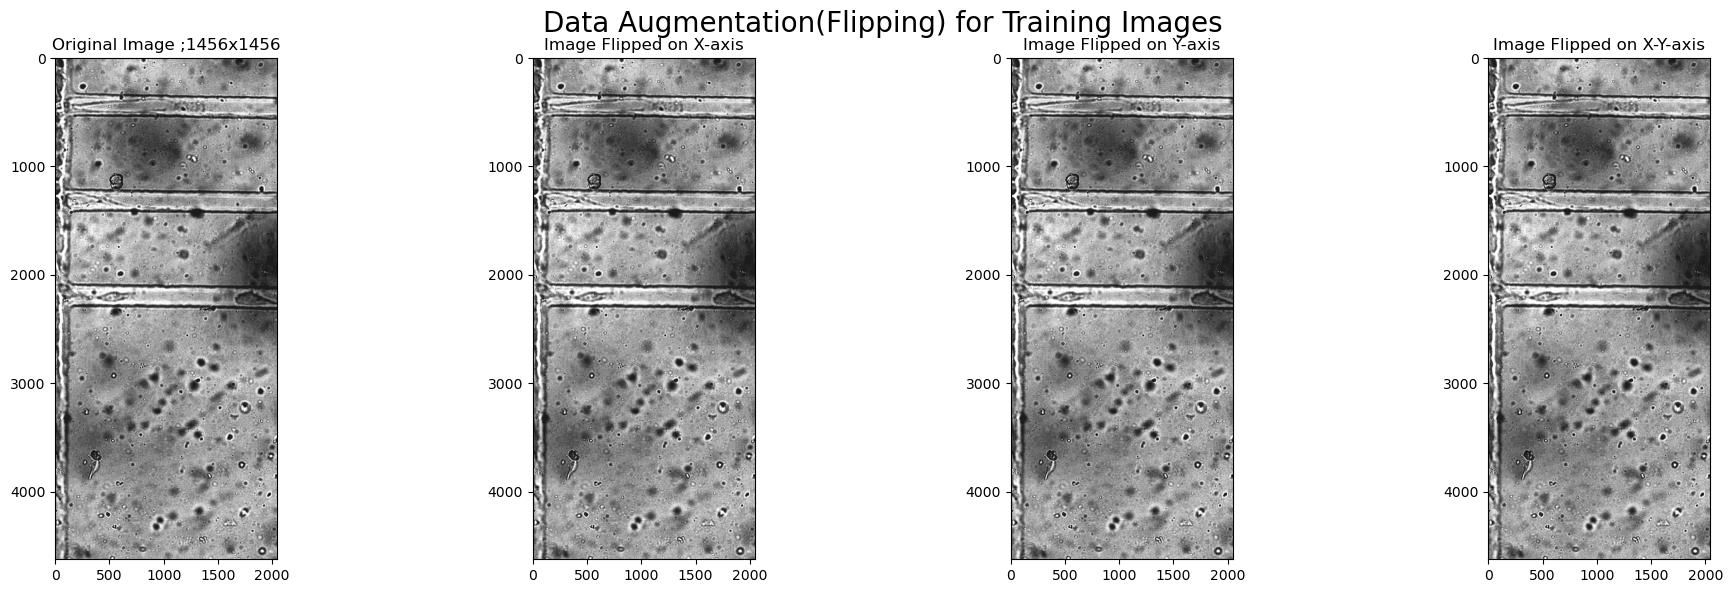

In [11]:
# from PIL import Image
# import numpy as np
# import imageio
# import matplotlib.pyplot as plt
# import tifffile as tiff
# from skimage.transform import resize


tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-P2/01/t0175.tif')
# tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
print(tmp_og.shape)
#img_og = resize(tmp_og, (512, 512))

tmp_Flp_X = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-P2/01/t0175.tif')
# tmp_Flp_X  = np.array(tmp_Flp_X , dtype=np.single)[None,:,:]
tmp_Flp_X .shape
# img_re = resize(tmp_re, (512, 512))


# print(tmp_og.shape)
# print(tmp_re.shape)
# gt_mask=tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
tmp_Flp_Y =imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-P2/01/t0175.tif")
# tmp_Flp_Y = np.array(tmp_Flp_Y, dtype=np.single)[None,:,:]
tmp_Flp_Y.shape
#gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
# img_msk = resize(gt_mask, (512, 512))

tmp_Flp_X_Y=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-P2/01/t0175.tif")
# tmp_Flp_X_Y = np.array(tmp_Flp_X_Y, dtype=np.single)[None,:,:]
tmp_Flp_X_Y.shape


fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20, 6)
fig.suptitle('Data Augmentation(Flipping) for Training Images',fontsize=20)
ax[0].imshow(tmp_og, cmap='gist_gray',alpha=0.9)
ax[1].imshow(tmp_Flp_X,cmap='gist_gray', alpha=0.9)
ax[2].imshow(tmp_Flp_Y,cmap='gist_gray', alpha=0.9)
ax[3].imshow(tmp_Flp_X_Y,cmap='gist_gray', alpha=0.9)
ax[0].title.set_text('Original Image ;1456x1456')
ax[1].title.set_text('Image Flipped on X-axis')
ax[2].title.set_text('Image Flipped on Y-axis')
ax[3].title.set_text('Image Flipped on X-Y-axis')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

Data Augmentation:  Flipping of Masks

In [24]:
# from PIL import Image
# import numpy as np
# import imageio
# import matplotlib.pyplot as plt
# # from skimage.transform import resize


# tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01_ST/SEG/man_seg0028.tif')
# # tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
# print(tmp_og.shape)
# #img_og = resize(tmp_og, (512, 512))

# tmp_Flp_X = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01_ST/SEG/man_seg0029.tif')
# # tmp_Flp_X  = np.array(tmp_Flp_X , dtype=np.single)[None,:,:]
# tmp_Flp_X .shape
# # img_re = resize(tmp_re, (512, 512))


# # print(tmp_og.shape)
# # print(tmp_re.shape)
# # gt_mask=tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
# tmp_Flp_Y =imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01_ST/SEG/man_seg0030.tif")
# # tmp_Flp_Y = np.array(tmp_Flp_Y, dtype=np.single)[None,:,:]
# tmp_Flp_Y.shape
# #gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
# # img_msk = resize(gt_mask, (512, 512))

# tmp_Flp_X_Y=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01_ST/SEG/man_seg0031.tif")
# # tmp_Flp_X_Y = np.array(tmp_Flp_X_Y, dtype=np.single)[None,:,:]
# tmp_Flp_X_Y.shape


# # fig, ax = plt.subplots(1, 4, figsize=(10, 5))
# fig, ax = plt.subplots(1, 4)
# fig.set_size_inches(20, 6)
# fig.suptitle('Data Augmentation(Flipping) for Training Masks',fontsize=20)
# ax[0].imshow(tmp_og, cmap='gist_gray',alpha=0.9)
# ax[1].imshow(tmp_Flp_X,cmap='gist_gray', alpha=0.9)
# ax[2].imshow(tmp_Flp_Y,cmap='gist_gray', alpha=0.9)
# ax[3].imshow(tmp_Flp_X_Y,cmap='gist_gray', alpha=0.9)
# ax[0].title.set_text('Original Mask  ;1456x1456')
# ax[1].title.set_text('Mask Flipped on X-axis')
# ax[2].title.set_text('Mask Flipped on Y-axis')
# ax[3].title.set_text('Mask Flipped on X-Y-axis')
# fig.tight_layout()
# fig.subplots_adjust(top=0.9)
# plt.show()

In [25]:
# import tifffile as tiff
# import matplotlib.pyplot as plt

# tmp_og = tiff.imread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01/t034.tif')
# tmp_GT_seg = tiff.imread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01_GT/SEG/man_seg034.tif')
# tmp_GT_tra = tiff.imread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01_GT/TRA/man_track034.tif')
# tmp_ST_seg = tiff.imread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01_ST/SEG/man_seg034.tif')

# fig, ax = plt.subplots(1, 4)
# fig.set_size_inches(20, 6)
# fig.suptitle('DIC-Hela Data set Images', fontsize=20)

# ax[0].imshow(tmp_og, cmap='gist_earth', alpha=0.9)
# ax[1].imshow(tmp_GT_seg, cmap='gist_earth', alpha=0.9)
# ax[2].imshow(tmp_GT_tra, cmap='gist_earth', alpha=0.9)
# ax[3].imshow(tmp_ST_seg, cmap='gist_earth', alpha=0.9)

# ax[0].title.set_text('Original Image')
# ax[1].title.set_text('GT for Segmentation')
# ax[2].title.set_text('GT for Tracking')
# ax[3].title.set_text('ST for Segmentation')

# fig.tight_layout()
# fig.subplots_adjust(top=0.9)
# plt.show()



In [43]:
import tifffile as tiff
import matplotlib.pyplot as plt
import imageio
import imagecodecs

tmp_og = tiff.imread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01/t034.tif')
tmp_GT_seg = tiff.imread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01_GT/SEG/man_seg034.tif')
# tmp_GT_tra =tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01_GT/TRA/man_track034.tif")
# tmp_ST_seg=tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01_ST/SEG/man_seg034.tif")


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 10)
fig.suptitle('DIC-Hela Data set Images',fontsize=20)
ax[0].imshow(tmp_og, cmap='gist_earth',alpha=0.9)
ax[1].imshow(tmp_GT_seg,cmap='gist_earth', alpha=0.9)
# ax[2].imshow(tmp_GT_tra,cmap='gist_earth', alpha=0.9)
# ax[3].imshow(tmp_ST_seg,cmap='gist_earth', alpha=0.9)
ax[0].title.set_text('Original Image' )
ax[1].title.set_text('GT for Segmentation')
# ax[2].title.set_text('GT for Tracking')
# ax[3].title.set_text('ST for segmentation')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

ValueError: TiffPage 0: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package

In [44]:
import imageio

img = imageio.imread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01/t034.tif')

ValueError: TiffPage 0: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package

FileNotFoundError: No such file: '/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part1_500/01/t0012.tif'

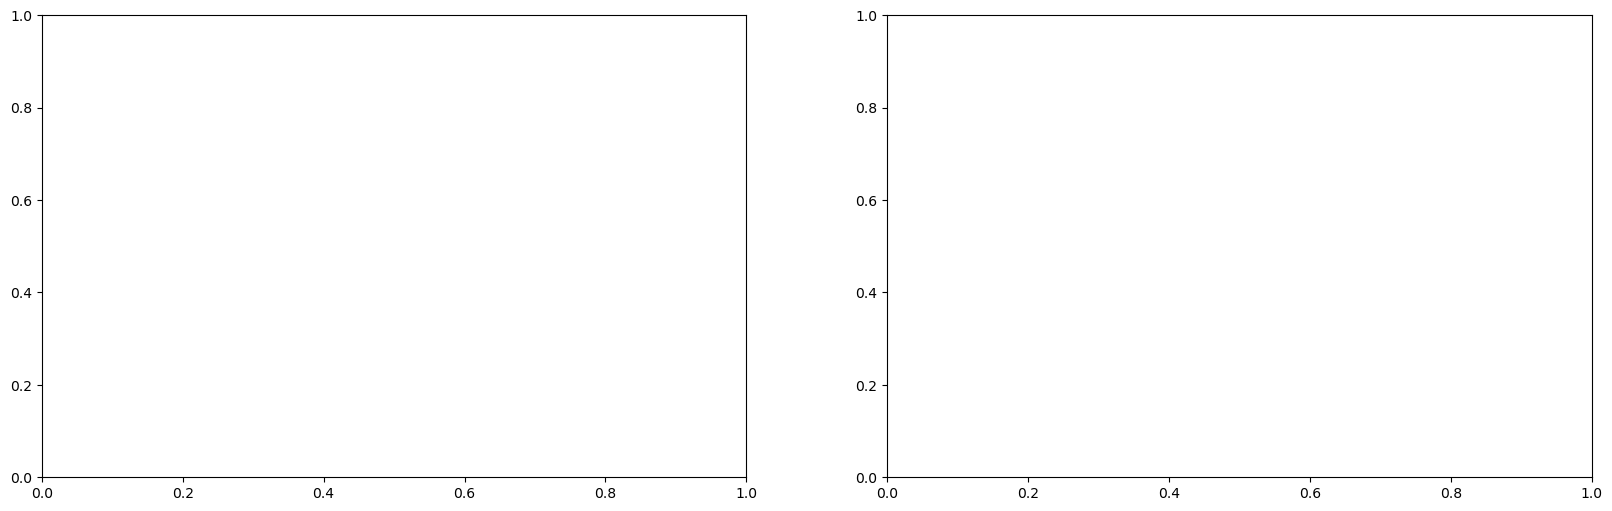

In [39]:
import tifffile as tiff
import matplotlib.pyplot as plt
import imageio
import imagecodecs


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
og_img = imageio.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part1_500/01/t0012.tif")
#plt.imshow(og_img, cmap='gist_gray',alpha=0.9)

gt_mask=imageio.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part1_500/01_ST/SEG/man_seg0012.tif")
#plt.imshow(gt_mask, cmap='Set1',alpha=0.5)
ax[0].imshow(og_img, cmap='gist_gray',alpha=0.9)
ax[1].imshow(gt_mask,cmap='Set1', alpha=0.5)
plt.show()
print(og_img.shape)
print(gt_mask.shape)

# og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t{i:04d}.tif")
# gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg{i:04d}.tif")
# plt.imshow(og_img, cmap='gist_gray',alpha=0.9)
# plt.imshow(gt_mask, cmap='Set1',alpha=0.5)



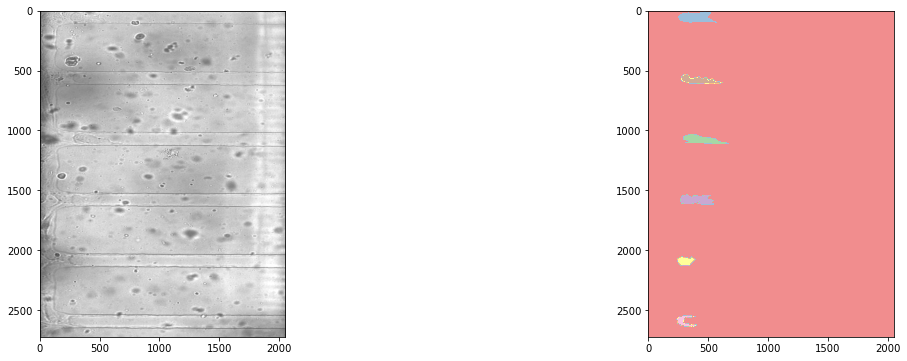

(2724, 2048)
(2724, 2048)


In [31]:
import tifffile as tiff
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part2_1761/01/t0012.tif")
#plt.imshow(og_img, cmap='gist_gray',alpha=0.9)

gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part2_1761/01_ST/SEG/man_seg0012.tif")
#plt.imshow(gt_mask, cmap='Set1',alpha=0.5)
ax[0].imshow(og_img, cmap='gist_gray',alpha=0.9)
ax[1].imshow(gt_mask,cmap='Set1', alpha=0.5)
plt.show()
print(og_img.shape)
print(gt_mask.shape)

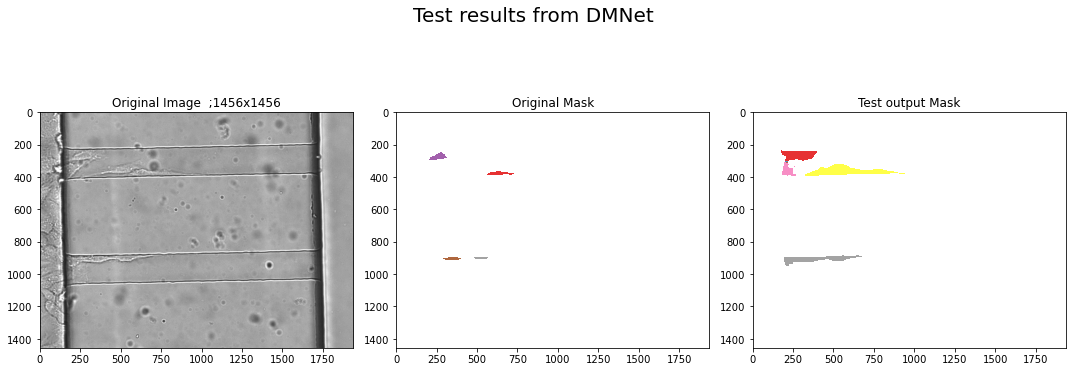

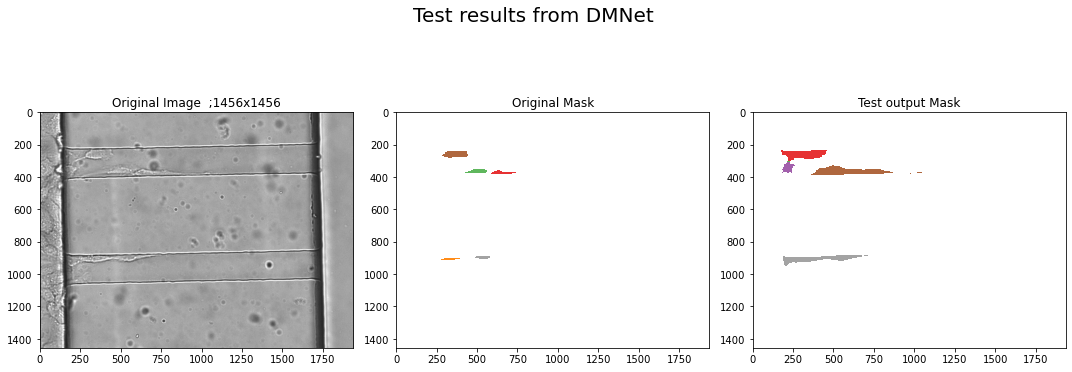

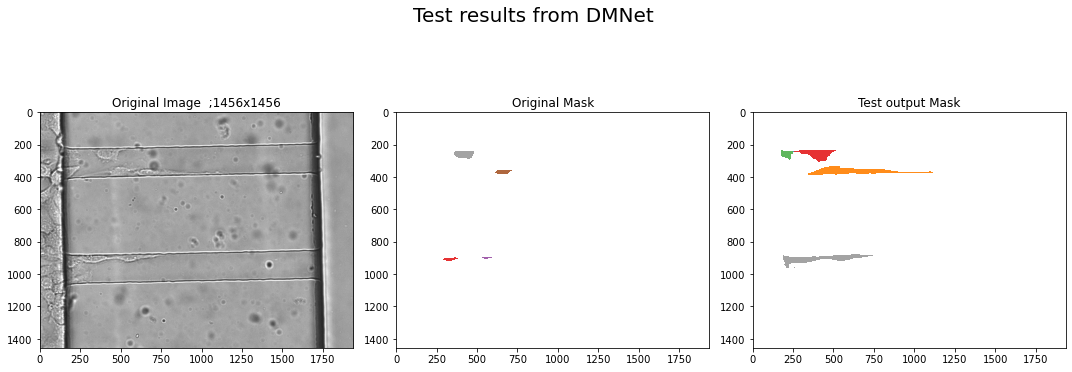

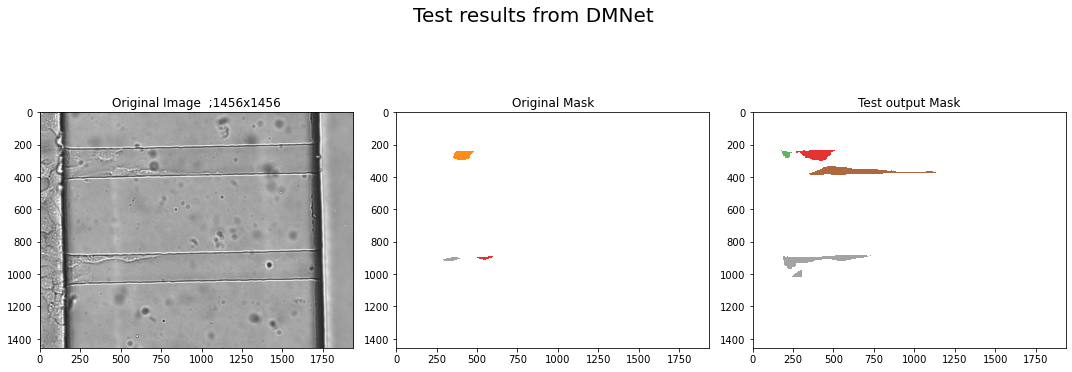

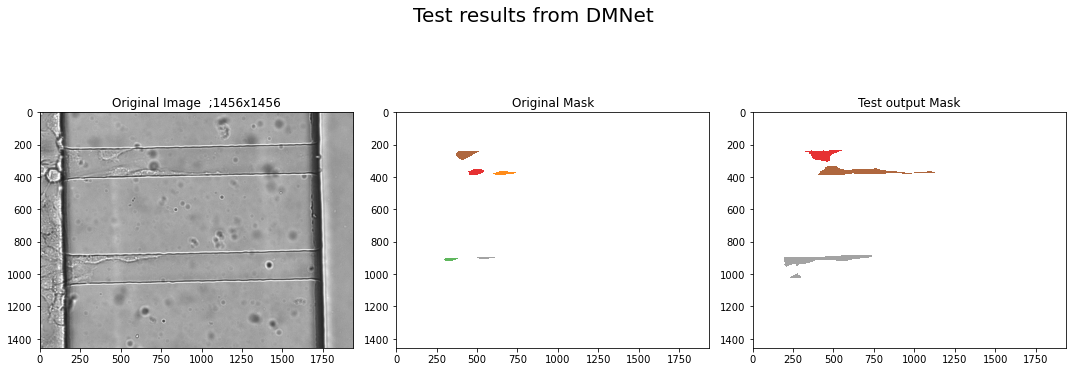

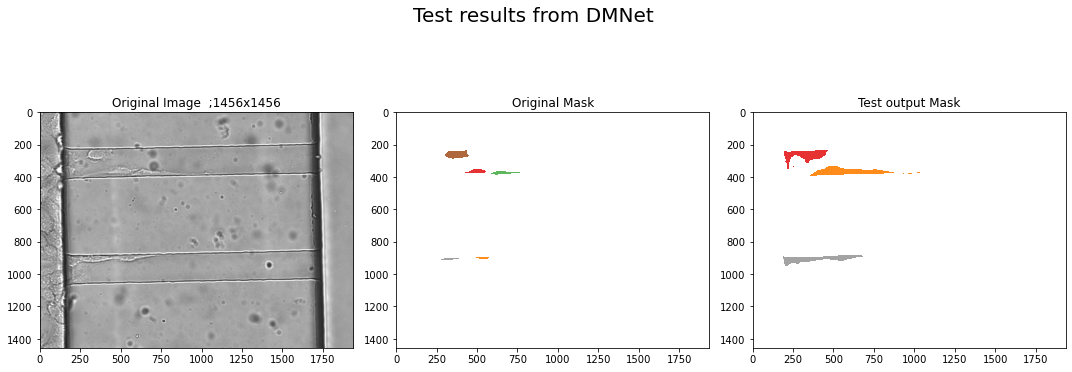

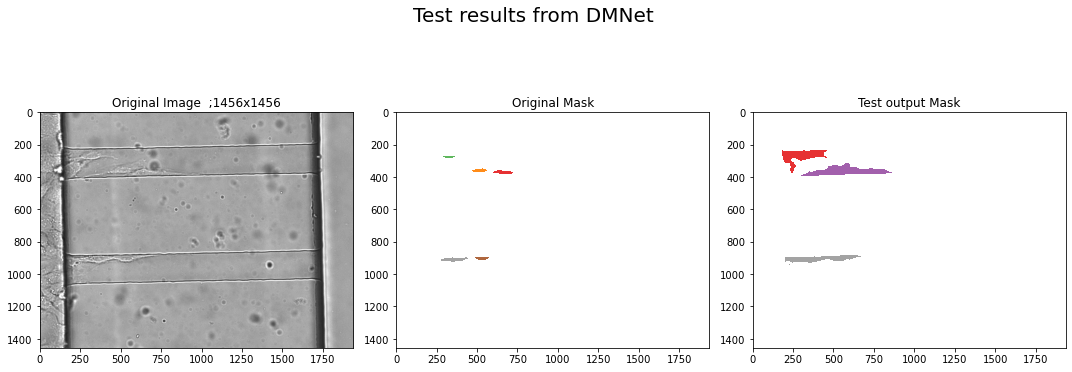

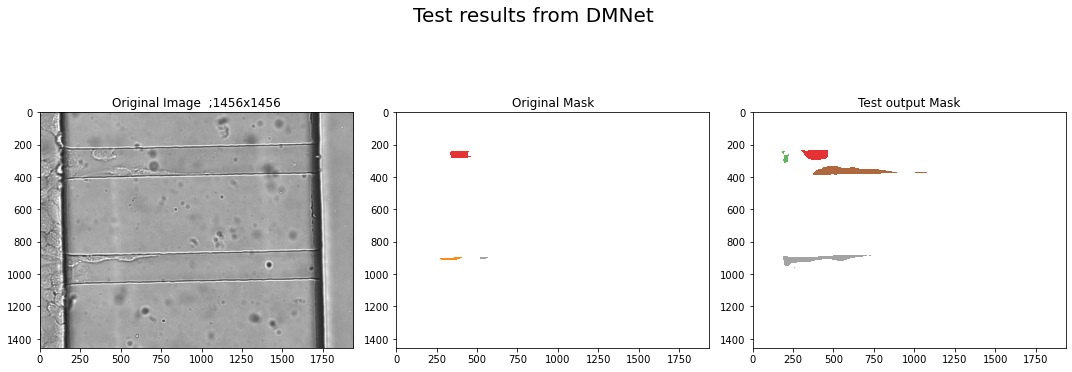

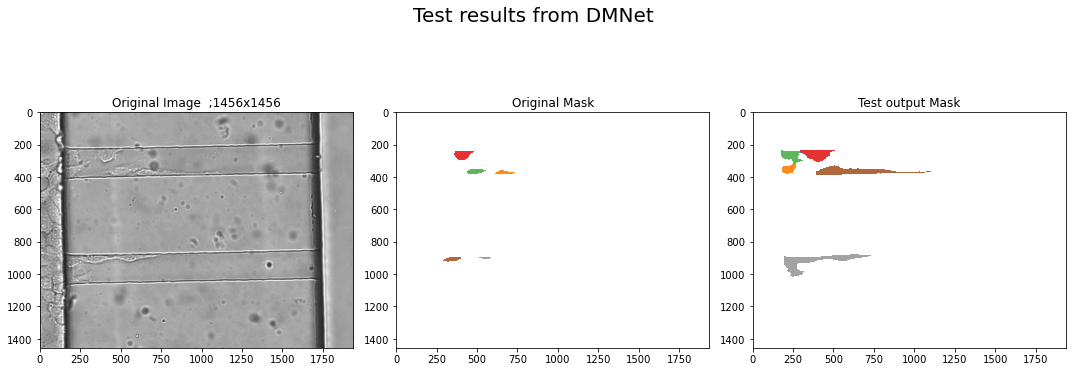

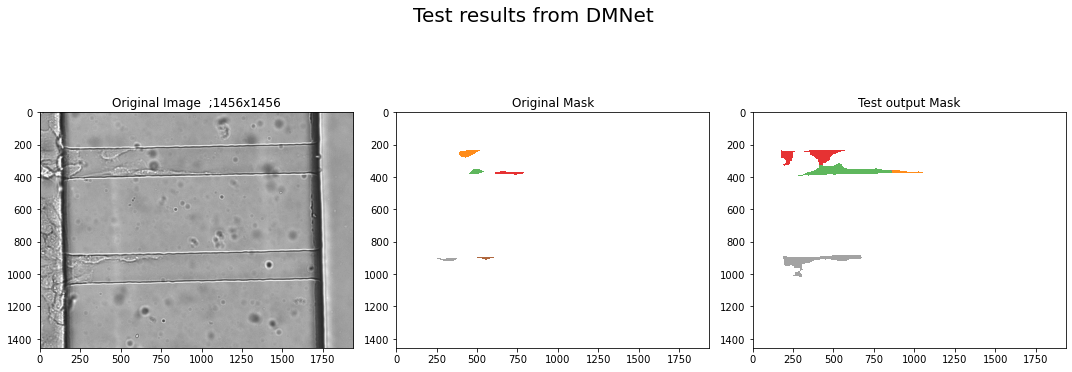

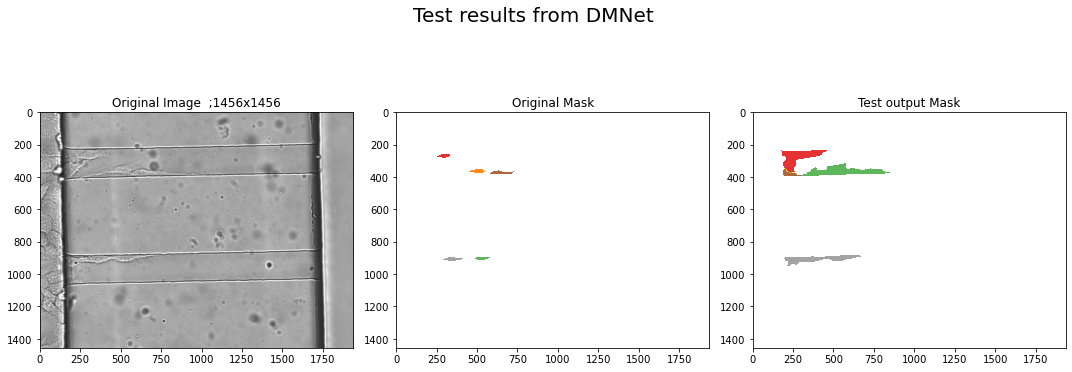

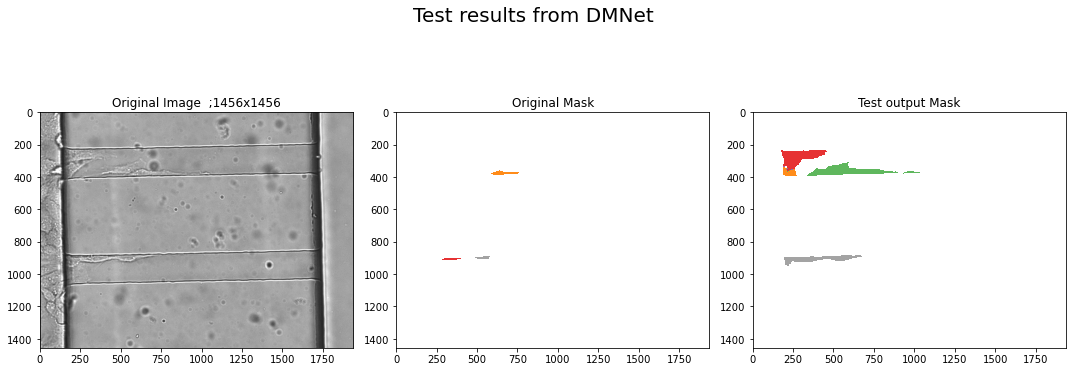

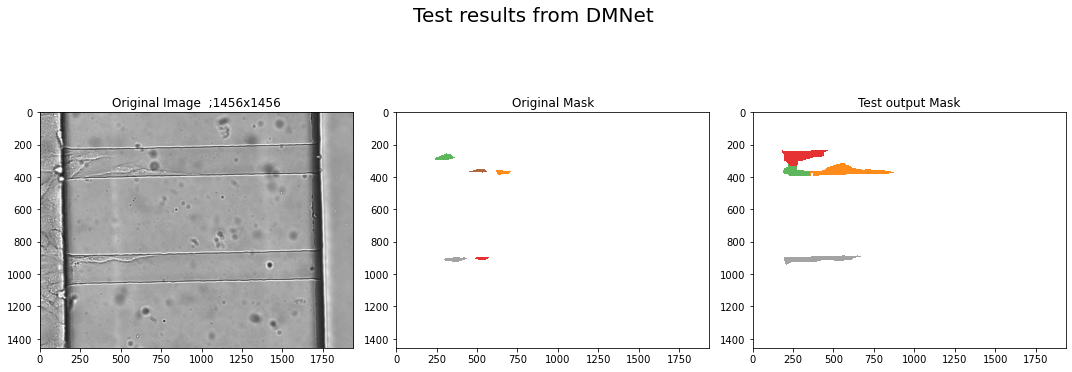

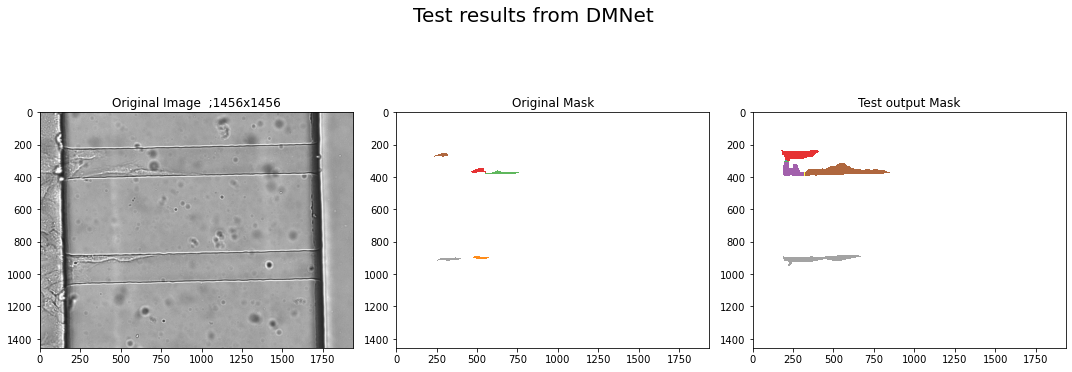

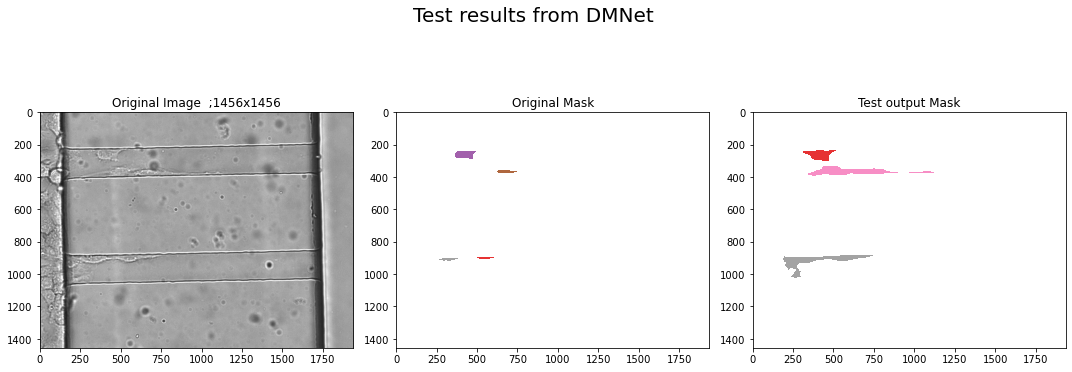

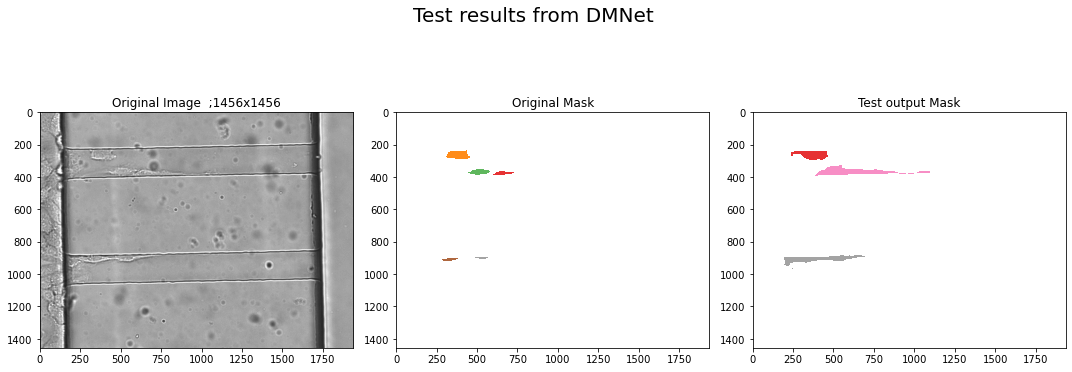

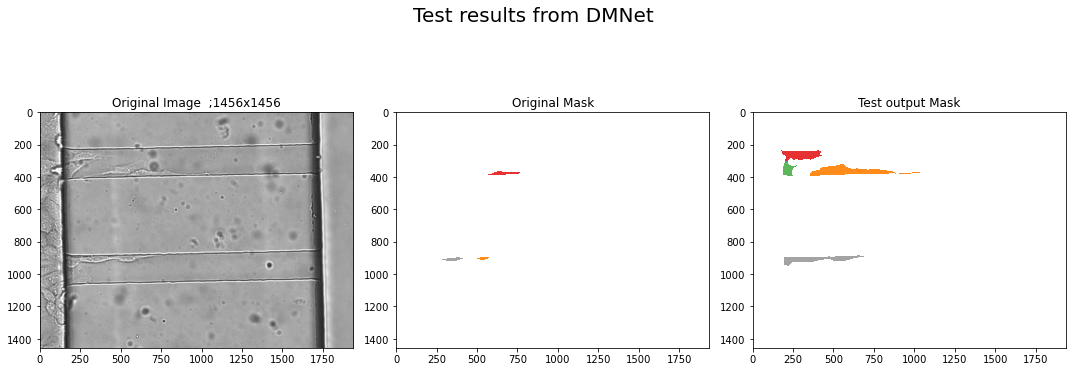

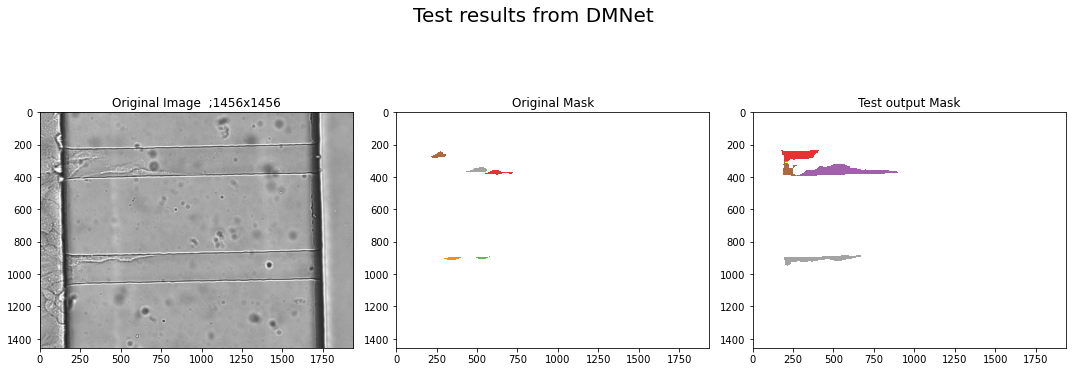

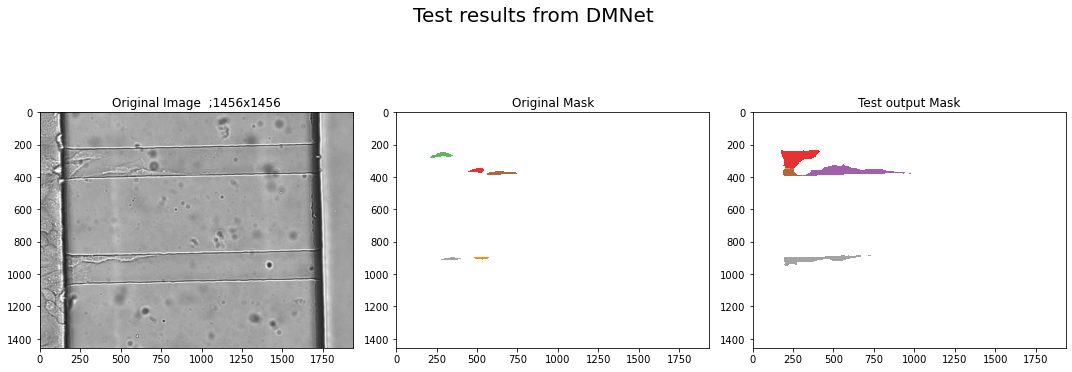

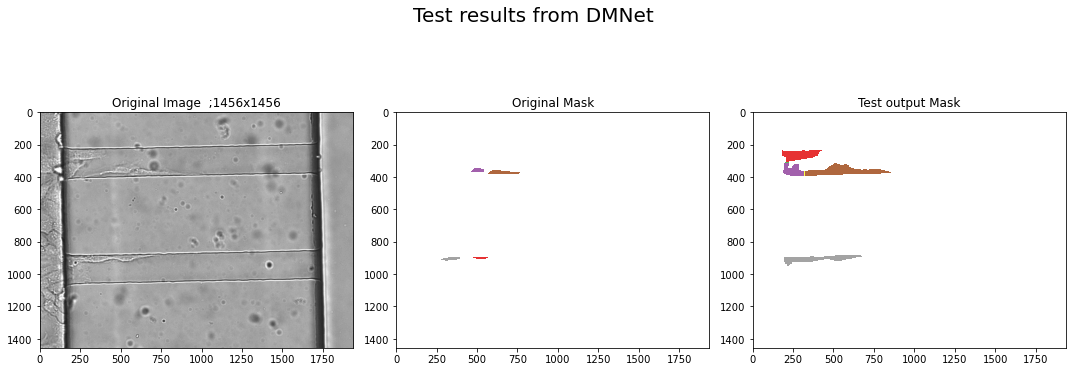

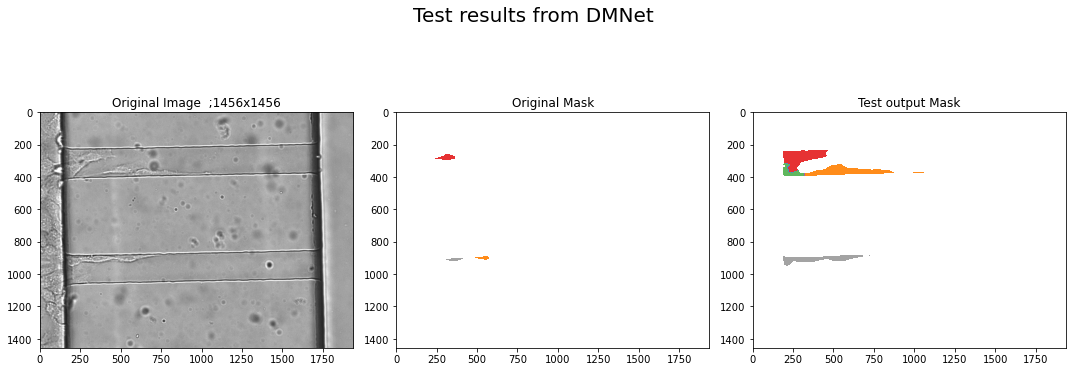

In [2]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



for i in range(21):
    # Path to the raw image (like datasets/raw/Cell_Data/02/imagename.tif)
    og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t{i:04d}.tif")


    # Path to the actual mask (like datasets/raw/Cell_Data/02_GT/SEG/imagename.tif)
    gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg{i:04d}.tif")
    gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
    #gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)


    # Path to the segmentation mask (like test_restuls/mask____.tif)
    pred_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/Cell-Data/02_RES-GT/mask{i:04d}.tif")
    pred_mask = np.ma.masked_where(pred_mask == 0, pred_mask)



    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(15, 6)
    fig.suptitle('Test results from DMNet ',fontsize=20)

    ax[0].imshow(og_img, cmap='gist_gray',alpha=0.9)
    ax[1].imshow(gt_mask, cmap='Set1',alpha=0.9)
    ax[2].imshow(pred_mask, cmap='Set1',alpha=0.9)

    ax[0].title.set_text('Original Image  ;1456x1456')
    ax[1].title.set_text('Original Mask')
    ax[2].title.set_text('Test output Mask')

    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()

In [ ]:

from PIL import Image
import numpy as np
import imageio

tmp_pred = imageio.volread('/home/MinaHossain/DMNet_Rina/Cell-Data/02_RES-GT/mask005.tif')
tmp_pred = np.array(tmp_pred, dtype=np.single)[None,:,:]
#tmp_pred.shape

tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
#tmp_og.shape


tmp_gt = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
tmp_gt = np.array(tmp_gt, dtype=np.single)[None,:,:]
#tmp_gt.shape

print(tmp_pred.shape)
print(tmp_og.shape)
print(tmp_gt.shape)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# df = pd.read_csv('training_codes/Val_Loss')
# df.plot(x='Epoch', y='Val_Loss', kind='line')
# plt.title('Line plot of B vs A')
# plt.xlabel('A')
# plt.ylabel('B')
# plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df_train = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Train_Loss_n3')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
# plt.figure(figsize=(15, 6))
# sns.lineplot(x='Epoch', y='Train_Loss', data=df_train)

df_val = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Val_Loss_n3')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
# plt.figure(figsize=(15, 6))
# sns.lineplot(x='Epoch', y='Val_Loss', data=df_val)


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(25, 10)


fig.suptitle('Training results of DMNet on Mask Prediction from 400 Epocs',fontsize=20)

sns.lineplot(x='Epoch', y='Train_Loss', data=df_train, ax=ax[0])
ax[0].title.set_text('Cross Entropy Loss in Training')
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Cross Entropy Loss')


sns.lineplot(x='Epoch', y='Val_Loss', data=df_val, ax=ax[1])
ax[1].title.set_text('Cross Entropy Loss in Validation')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Cross Entropy Loss')


fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()



# plt.title('Plot of Validation Loss versus Epoch for Mask-Training ')
# plt.xlabel('Number of Epoch')
# plt.ylabel('Validation Loss')
# plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df_train = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Train_Loss_n3a')
df_val = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Val_Loss_n3a')



fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
fig.suptitle('Training results of DMNet on Marker Detection from 400 Epocs',fontsize=20)


sns.lineplot(x='Epoch', y='Train_Loss', data=df_train, ax=ax[0])
ax[0].title.set_text('Cross Entropy Loss in Training')
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Cross Entropy Loss')


sns.lineplot(x='Epoch', y='Val_Loss', data=df_val, ax=ax[1])
ax[1].title.set_text('Cross Entropy Loss in Validation')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Cross Entropy Loss')


fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Val_Loss')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
plt.figure(figsize=(15, 6))
sns.lineplot(x='Epoch', y='Val_Loss', data=df)
plt.title('Plot of validation Loss versus Epoch for Mask-Training')
plt.xlabel('Number of Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Train_Loss')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
plt.figure(figsize=(15, 6))
sns.lineplot(x='Epoch', y='Train_Loss', data=df)
plt.title('Plot of Training Loss versus Epoch for Mask-Training')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Val_Loss_1')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
plt.figure(figsize=(15, 6))
sns.lineplot(x='Epoch', y='Val_Loss', data=df)
plt.title('Plot of Validation Loss versus Epoch for Shapemarker-Training ')
plt.xlabel('Number of Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Train_Loss_1')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
plt.figure(figsize=(15, 6))
sns.lineplot(x='Epoch', y='Train_Loss', data=df)
plt.title('Plot of Training Loss versus Epoch for Shapemarker-Training')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
from PIL import Image
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.transform import resize




tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
#tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
print(tmp_og.shape)
#img_og = resize(tmp_og, (512, 512))

tmp_re = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
#tmp_re = np.array(tmp_re, dtype=np.single)[None,:,:]
#tmp_gt.shape
img_re = resize(tmp_re, (512, 512))


# print(tmp_og.shape)
# print(tmp_re.shape)
# gt_mask=tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
gt_mask=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg005.tif")
#gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
img_msk = resize(gt_mask, (512, 512))



fig, ax = plt.subplots(1, 3)
fig.set_size_inches(25, 15)
ax[0].imshow(tmp_og, cmap='gray')
ax[1].imshow(img_re,cmap='gray', alpha=0.6)
ax[2].imshow(img_msk,cmap='gray', alpha=0.6)


In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
tmp_og = np.array(tmp_og, dtype=np.single)
tmp_new=tmp_og[ :, 194:1650]
print(tmp_new.shape)

tmp_mask=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
#tmp_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
tmp_mask = np.array(tmp_mask, dtype=np.single)
tmp_mask=tmp_mask[ :, 194:1650]

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(25, 15)
ax[0].imshow(tmp_og, cmap='gray',alpha=0.6)
ax[1].imshow(tmp_new,cmap='gray', alpha=0.6)
ax[2].imshow(tmp_mask,cmap='gray', alpha=0.6)



In [ ]:
tmp = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01/t1377.tif')
tmp = np.array(tmp, dtype=np.single)[None,:,:]
tmp.shape 


Data Augmentation:  Rotation of Images

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.transform import rotate

tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01/t028.tif')
#print(tmp_og.shape)

rot_45 = rotate(tmp_og, angle=45, mode='reflect')
#print(rot_45 )
rot_90 = rotate(tmp_og, angle=90, mode='reflect')
#print(rot_90 )
rot_180 = rotate(tmp_og, angle=180, mode='reflect')
#print(rot_180.shape)

# tmp_Flp_X = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01/t029.tif')
# # tmp_Flp_X  = np.array(tmp_Flp_X , dtype=np.single)[None,:,:]
# tmp_Flp_X .shape
# # img_re = resize(tmp_re, (512, 512))


# # print(tmp_og.shape)
# # print(tmp_re.shape)
# # gt_mask=tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
# tmp_Flp_Y =imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01/t030.tif")
# # tmp_Flp_Y = np.array(tmp_Flp_Y, dtype=np.single)[None,:,:]
# tmp_Flp_Y.shape
# #gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
# # img_msk = resize(gt_mask, (512, 512))

# tmp_Flp_X_Y=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01/t031.tif")
# # tmp_Flp_X_Y = np.array(tmp_Flp_X_Y, dtype=np.single)[None,:,:]
# tmp_Flp_X_Y.shape



fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20, 6)
fig.suptitle('Data Augmentation(Rotation) for Training Images',fontsize=20)
ax[0].imshow(tmp_og, cmap='gist_gray',alpha=0.9)
ax[1].imshow(rot_45,cmap='gist_gray', alpha=0.9)
ax[2].imshow(rot_90,cmap='gist_gray', alpha=0.9)
ax[3].imshow(rot_180,cmap='gist_gray', alpha=0.9)
ax[0].title.set_text('Original Image ;  1456x1456')
ax[1].title.set_text('Image rotated at  45 degree')
ax[2].title.set_text('Image rotated at  90 degree')
ax[3].title.set_text('Image rotated at  180 degree')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

Data Augmentation:  Rotation of Masks

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.transform import rotate
# from skimage.transform import resize


tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01_ST/SEG/man_seg028.tif')
# tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
#print(tmp_og.shape)
#img_og = resize(tmp_og, (512, 512))

rot_45 = rotate(tmp_og, angle=45, mode='reflect')
#print(rot_45 )
rot_90 = rotate(tmp_og, angle=90, mode='reflect')
#print(rot_90 )
rot_180 = rotate(tmp_og, angle=180, mode='reflect')

# # print(tmp_og.shape)
# # print(tmp_re.shape)
# # gt_mask=tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
# tmp_Flp_Y =imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01_ST/SEG/man_seg030.tif")
# # tmp_Flp_Y = np.array(tmp_Flp_Y, dtype=np.single)[None,:,:]
# tmp_Flp_Y.shape
# #gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
# # img_msk = resize(gt_mask, (512, 512))

# tmp_Flp_X_Y=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01_ST/SEG/man_seg031.tif")
# # tmp_Flp_X_Y = np.array(tmp_Flp_X_Y, dtype=np.single)[None,:,:]
# tmp_Flp_X_Y.shape


# fig, ax = plt.subplots(1, 4, figsize=(10, 5))
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20, 6)
fig.suptitle('Data Augmentation(Rotation) for Training Masks',fontsize=20)
ax[0].imshow(tmp_og, cmap='gist_gray',alpha=0.9)
ax[1].imshow(rot_45,cmap='gist_gray', alpha=0.9)
ax[2].imshow(rot_90,cmap='gist_gray', alpha=0.9)
ax[3].imshow(rot_180,cmap='gist_gray', alpha=0.9)
ax[0].title.set_text('Original Mask  ;1456x1456')
ax[1].title.set_text('Mask Rotated at 45 degree')
ax[2].title.set_text('Mask Rotated at 90 degree')
ax[3].title.set_text('Mask Rotated at 180 degree')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

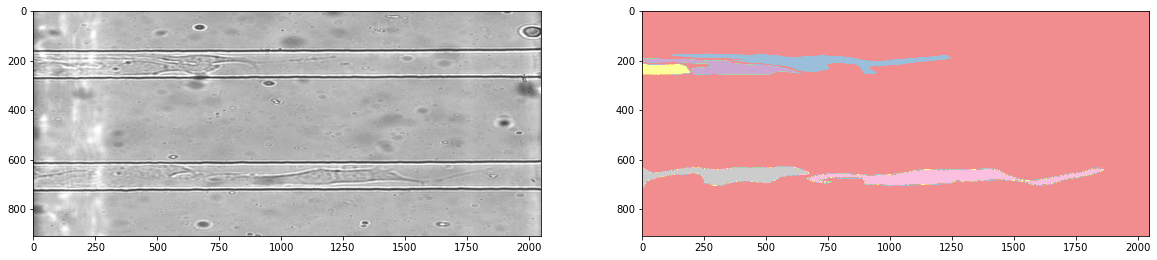

(908, 2048)
(908, 2048)


In [32]:
import tifffile as tiff
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part1_500/01/t0012.tif")
#plt.imshow(og_img, cmap='gist_gray',alpha=0.9)

gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part1_500/01_ST/SEG/man_seg0012.tif")
#plt.imshow(gt_mask, cmap='Set1',alpha=0.5)
ax[0].imshow(og_img, cmap='gist_gray',alpha=0.9)
ax[1].imshow(gt_mask,cmap='Set1', alpha=0.5)
plt.show()
print(og_img.shape)
print(gt_mask.shape)

# og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t{i:04d}.tif")
# gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg{i:04d}.tif")
# plt.imshow(og_img, cmap='gist_gray',alpha=0.9)
# plt.imshow(gt_mask, cmap='Set1',alpha=0.5)

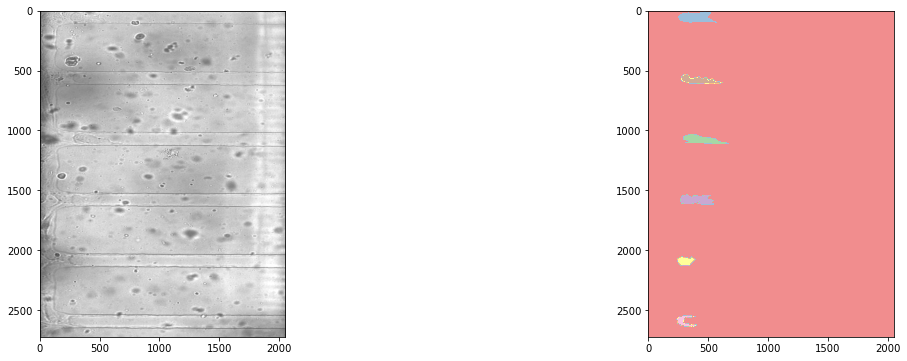

(2724, 2048)
(2724, 2048)


In [34]:
import tifffile as tiff
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part2_1761/01/t0012.tif")
#plt.imshow(og_img, cmap='gist_gray',alpha=0.9)

gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_LabelMe_Part2_1761/01_ST/SEG/man_seg0012.tif")
#plt.imshow(gt_mask, cmap='Set1',alpha=0.5)
ax[0].imshow(og_img, cmap='gist_gray',alpha=0.9)
ax[1].imshow(gt_mask,cmap='Set1', alpha=0.5)
plt.show()
print(og_img.shape)
print(gt_mask.shape)

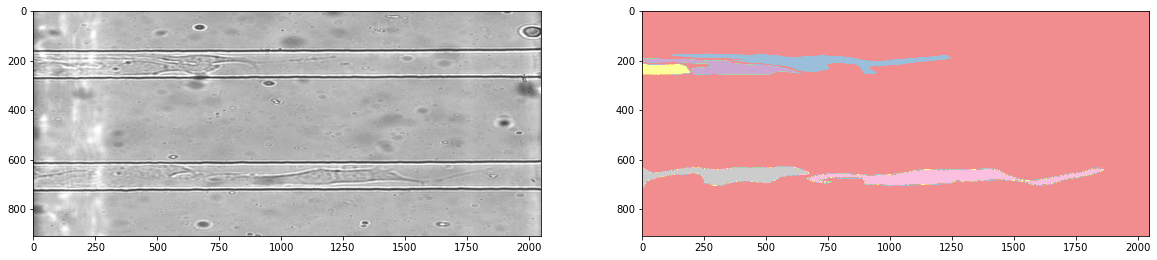

(908, 2048)
(908, 2048)


In [36]:
import tifffile as tiff
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_Merge_2298/01/t0012.tif")
#plt.imshow(og_img, cmap='gist_gray',alpha=0.9)

gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data_Merge_2298/01_ST/SEG/man_seg0012.tif")
#plt.imshow(gt_mask, cmap='Set1',alpha=0.5)
ax[0].imshow(og_img, cmap='gist_gray',alpha=0.9)
ax[1].imshow(gt_mask,cmap='Set1', alpha=0.5)
plt.show()
print(og_img.shape)
print(gt_mask.shape)

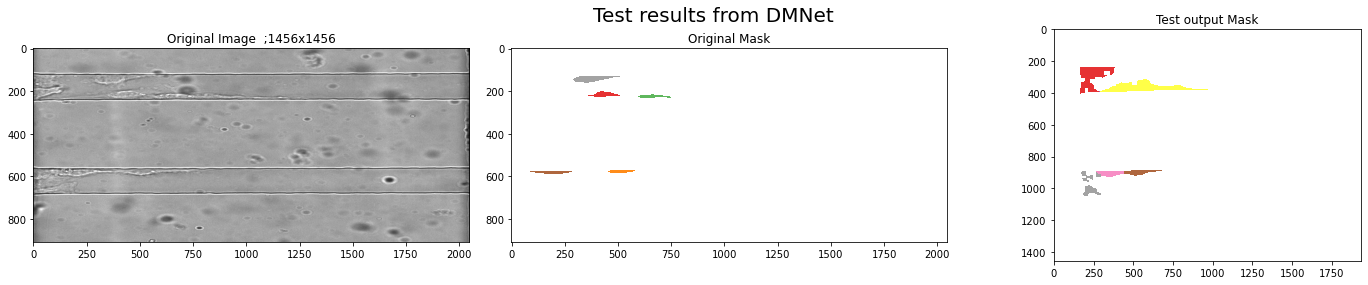

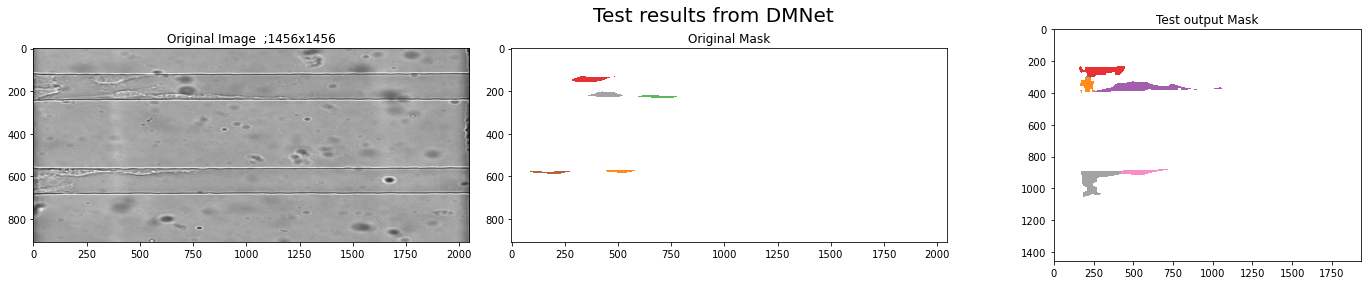

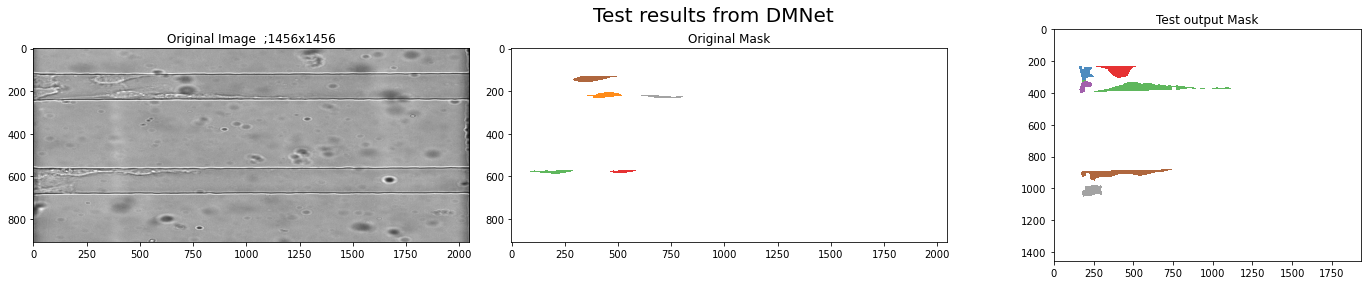

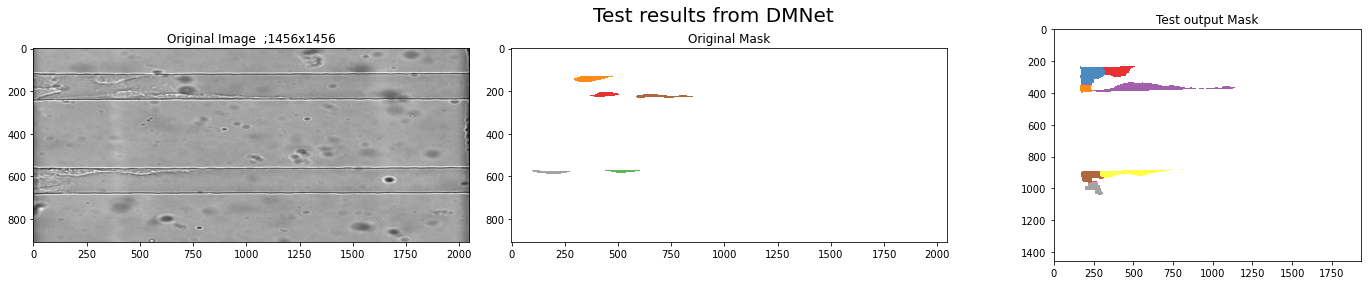

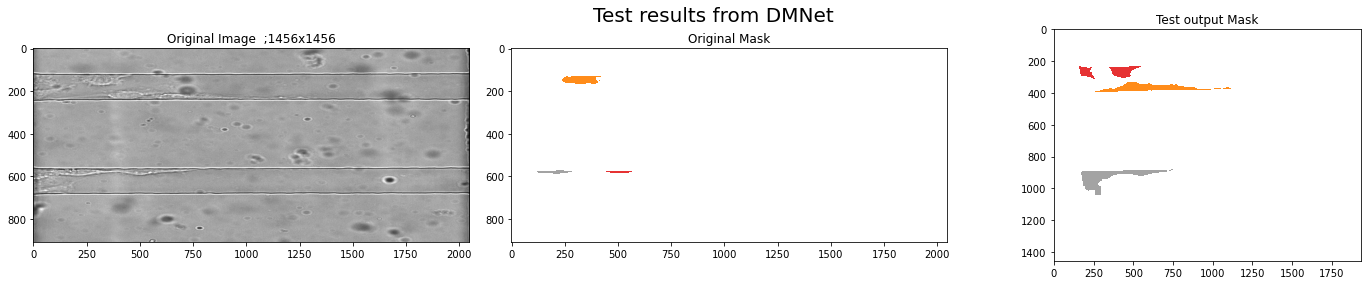

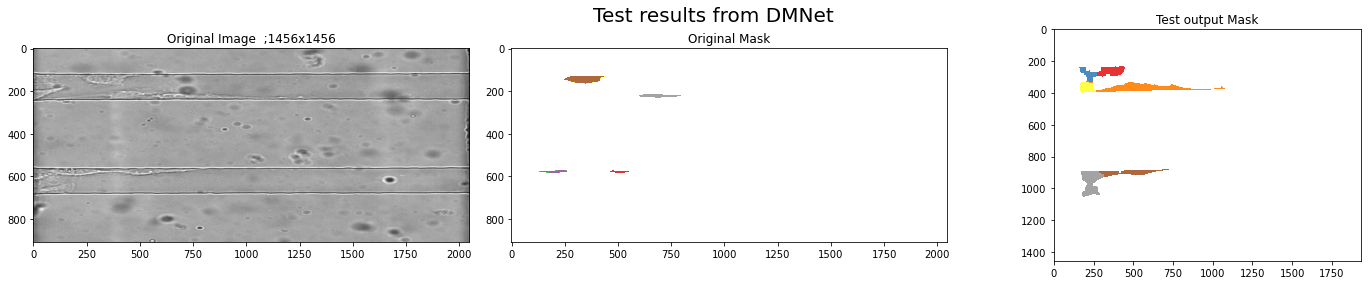

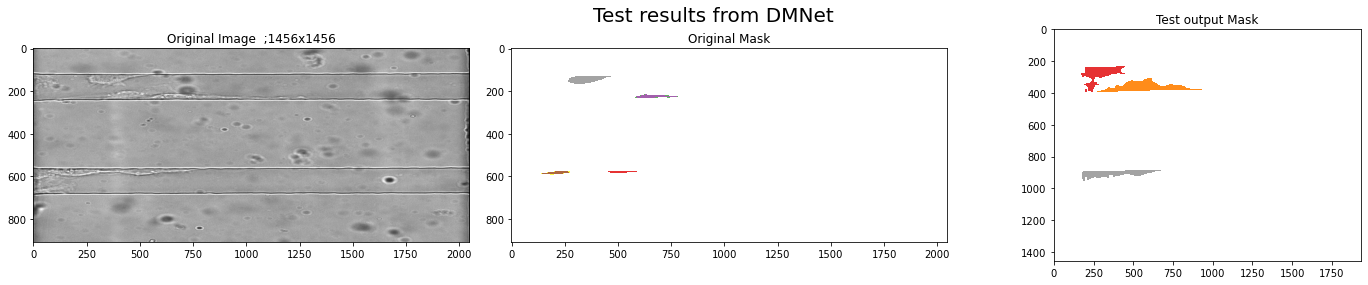

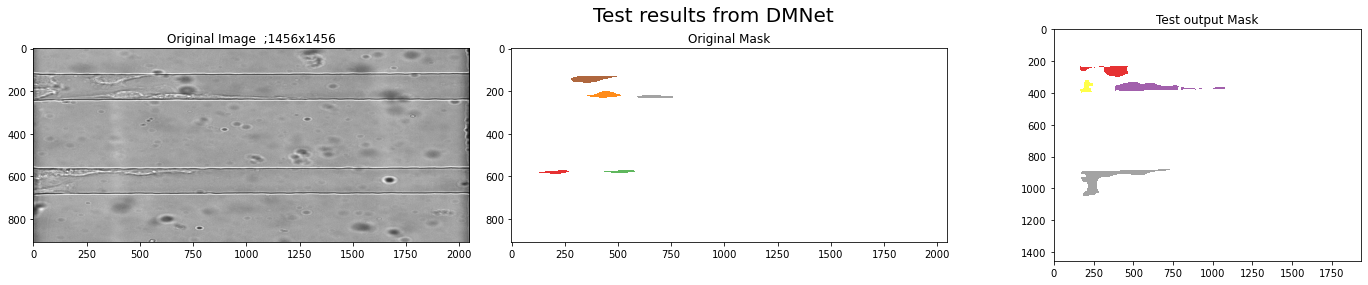

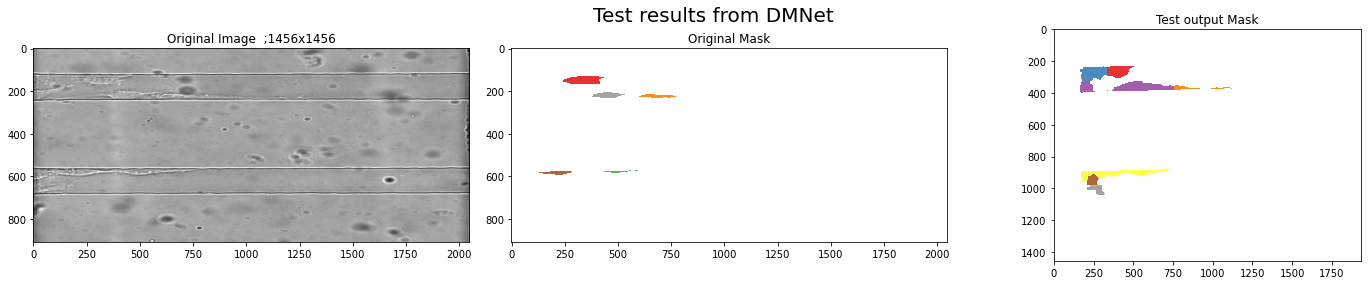

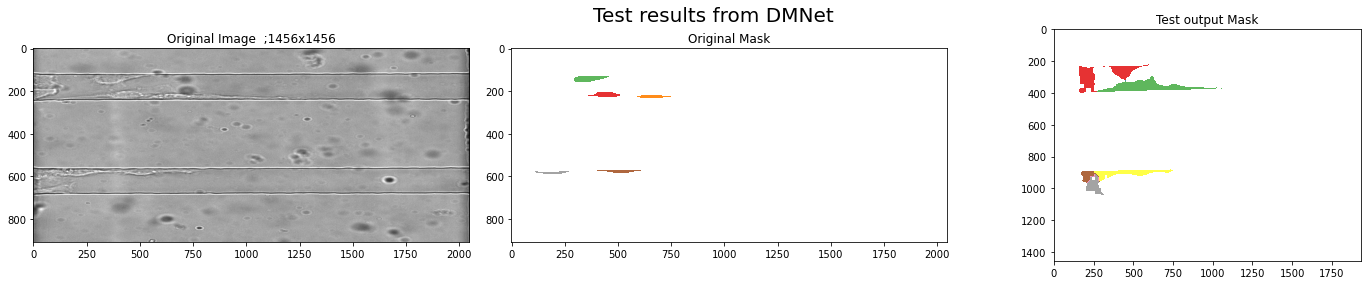

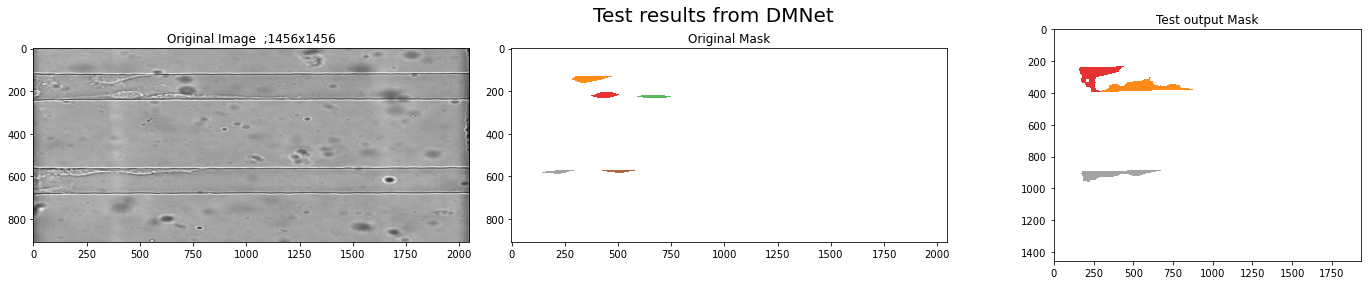

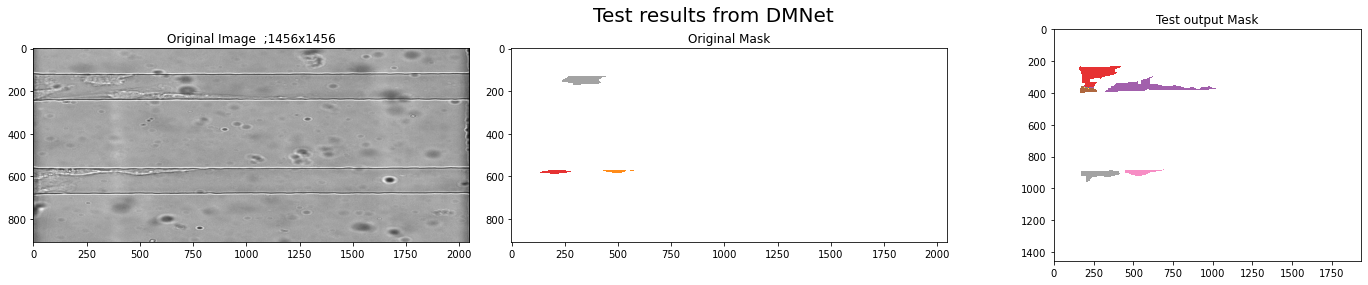

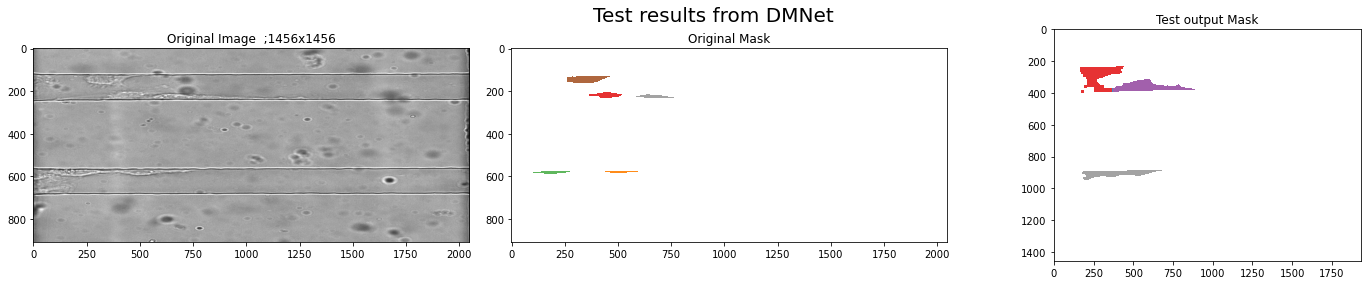

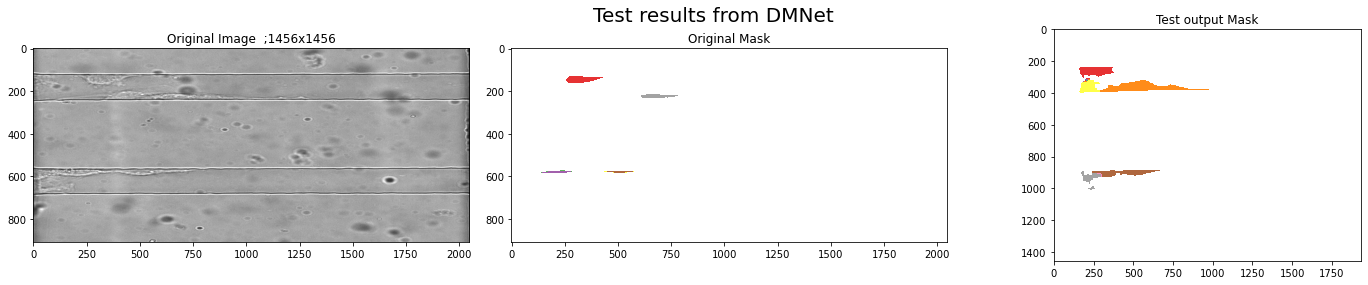

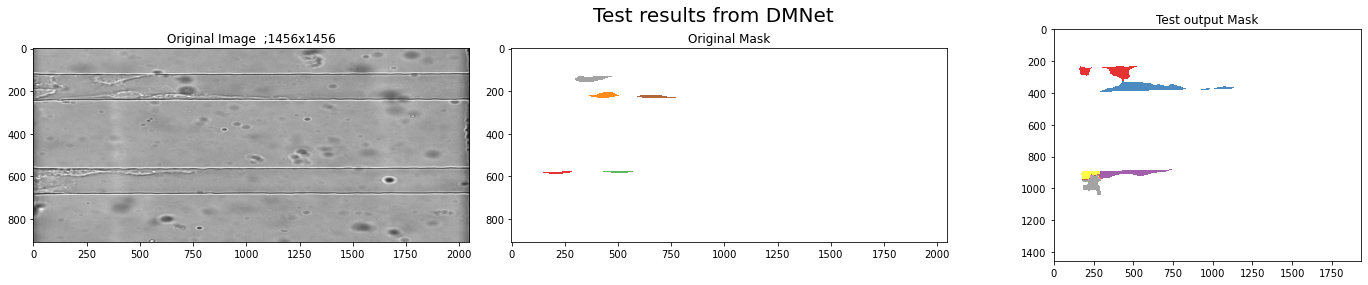

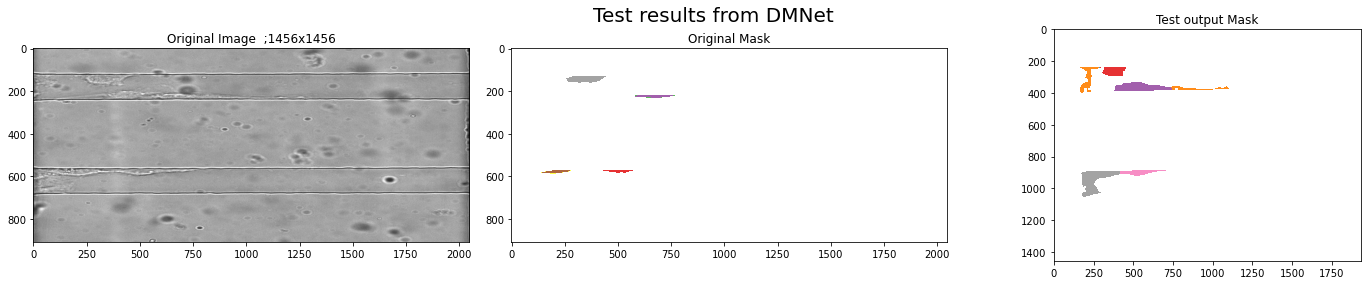

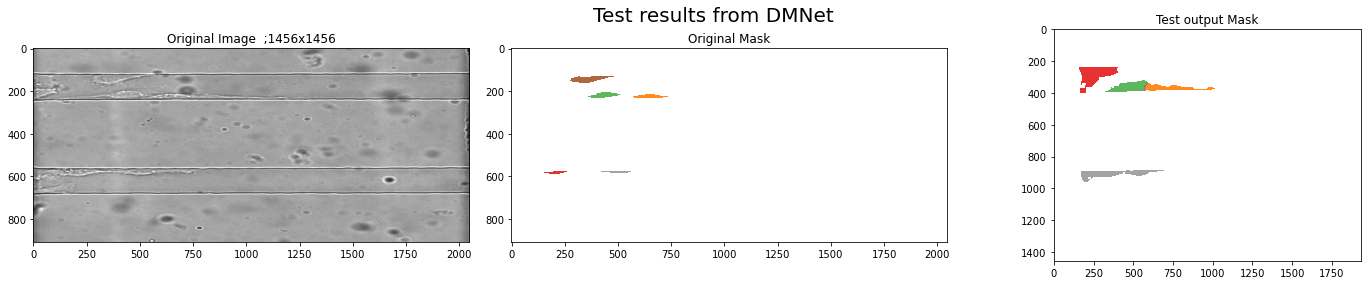

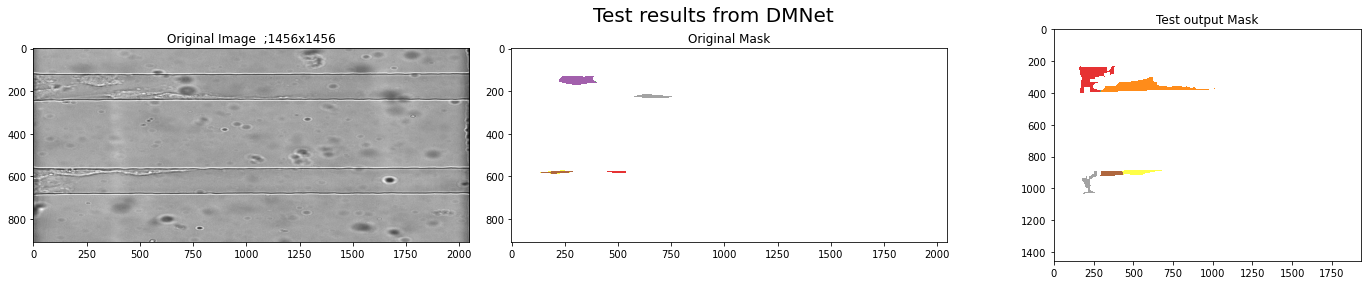

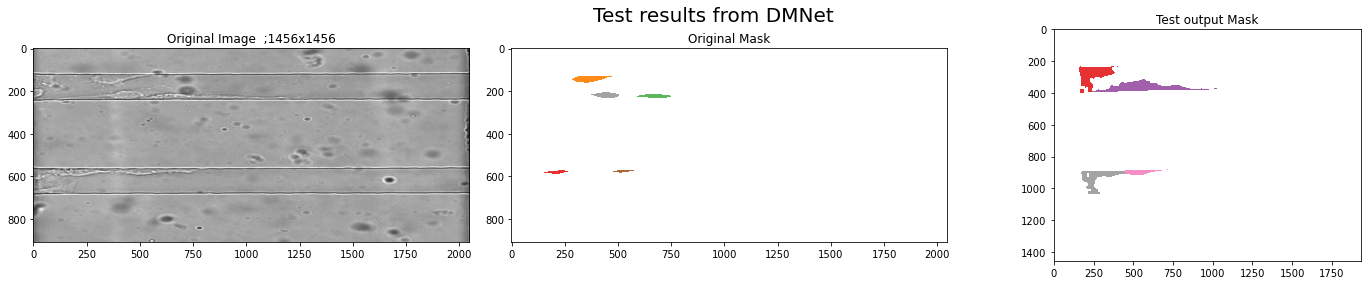

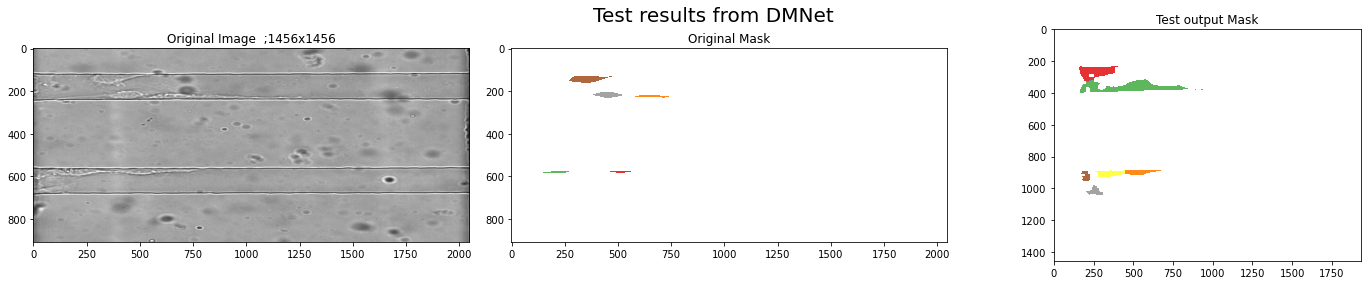

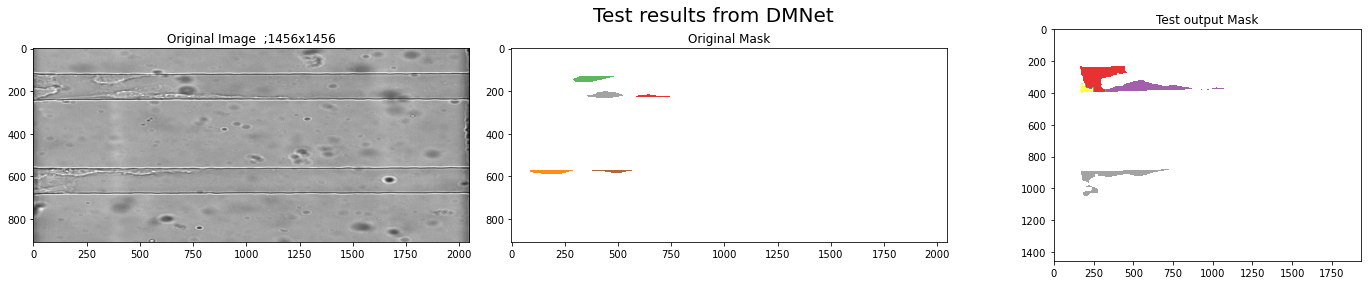

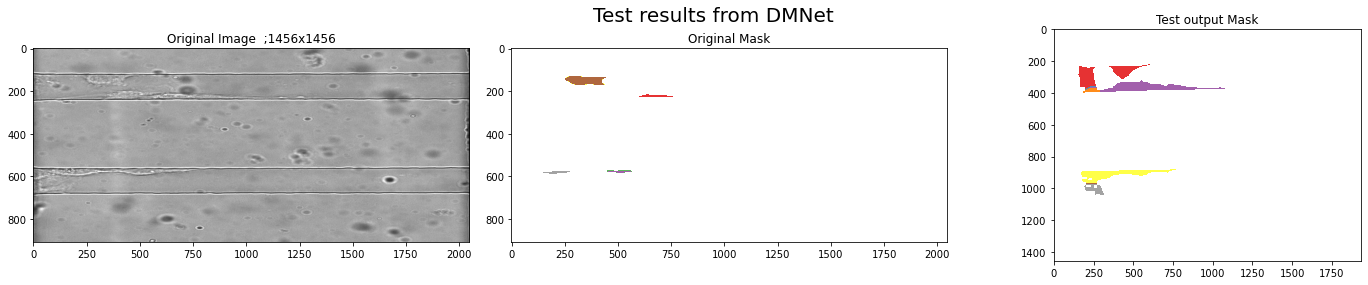

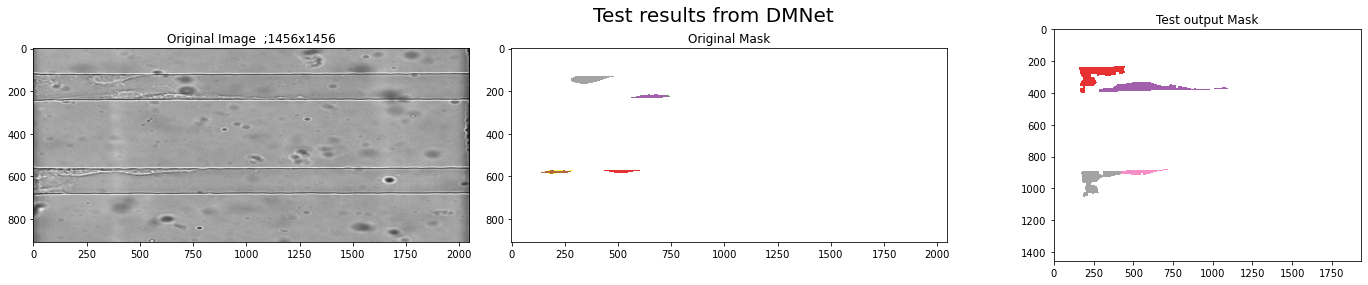

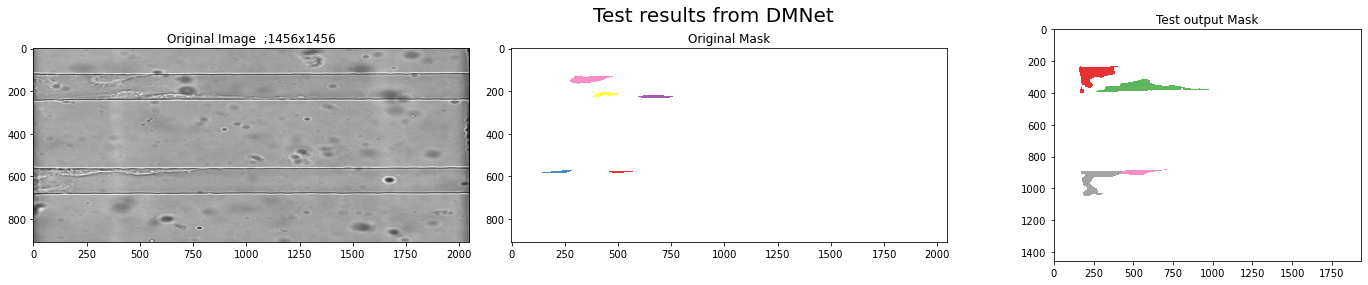

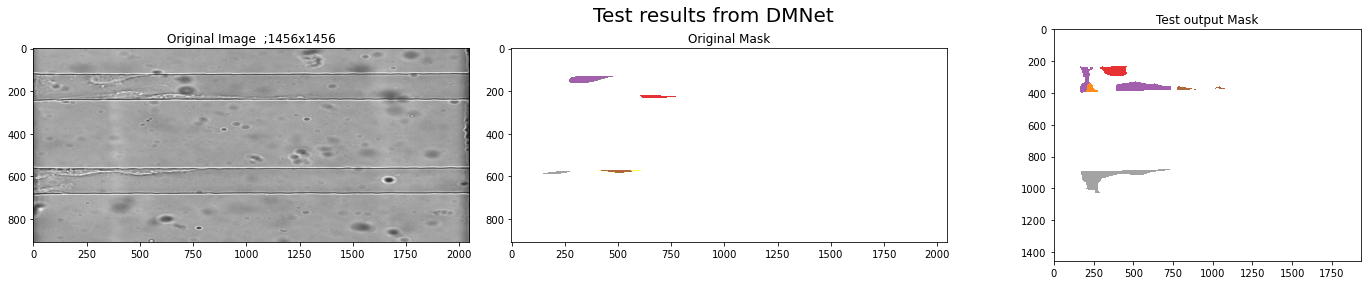

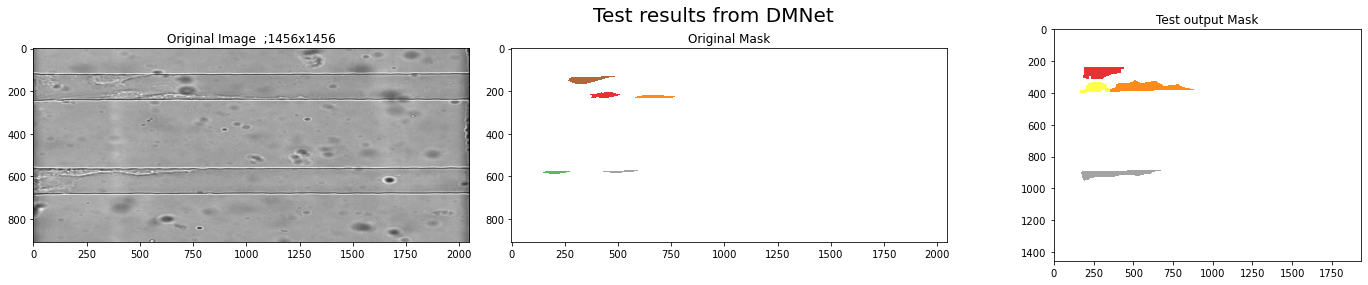

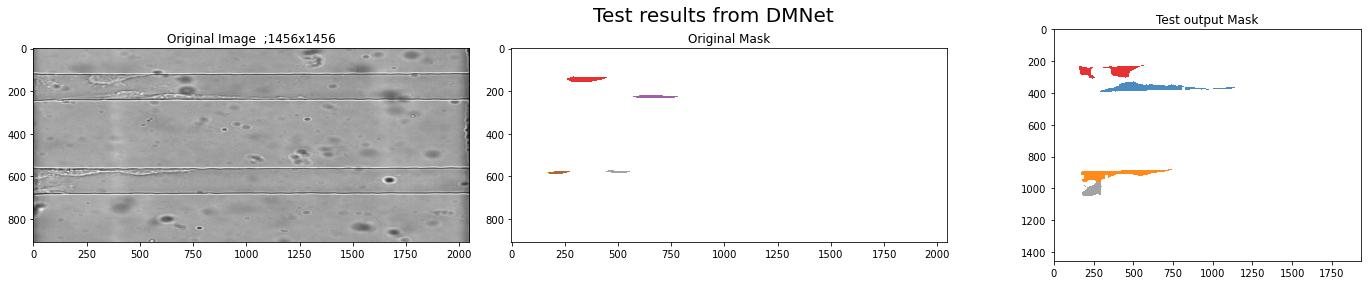

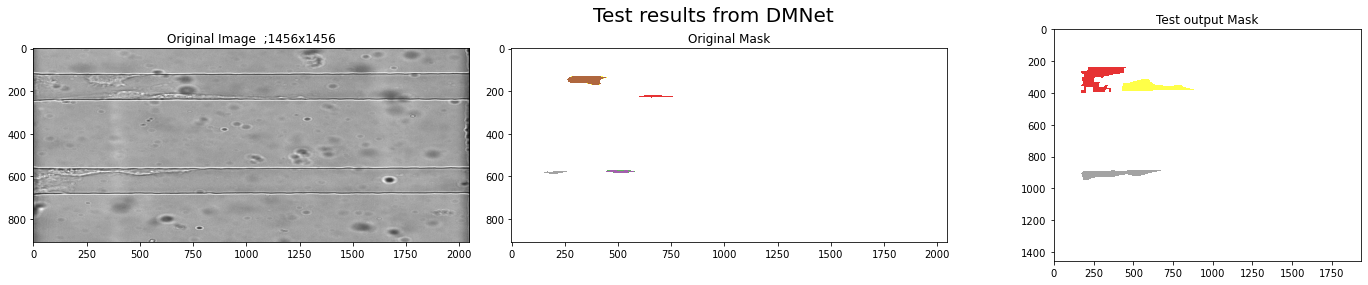

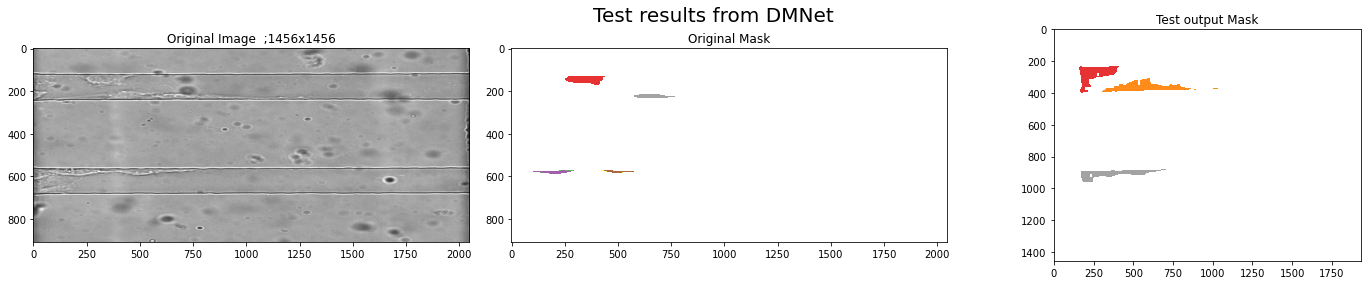

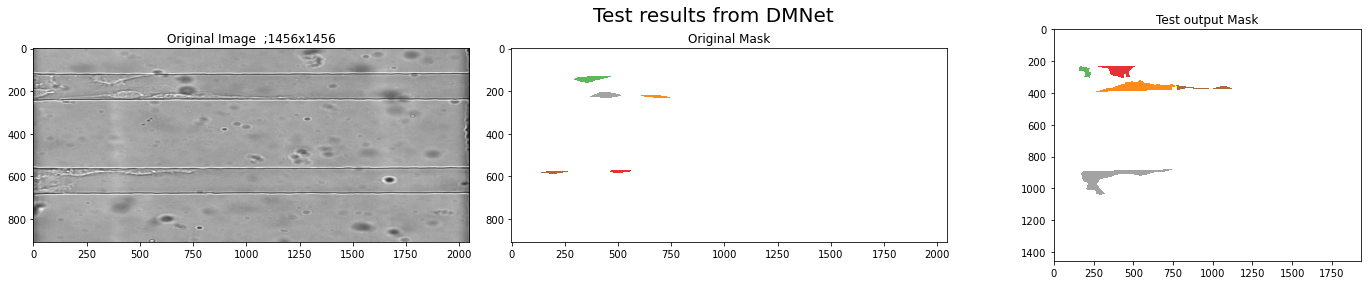

In [48]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Data_file = 'Labelme_Part1'
if not os.path.exists(f"/home/MinaHossain/DMNet_Rina/Plot_DM-Net/{Data_file}/"):
    os.makedirs(f"/home/MinaHossain/DMNet_Rina/Plot_DM-Net/{Data_file}/")

for i in range(30):
    # Path to the raw image (like datasets/raw/Cell_Data/02/imagename.tif)
    og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t{i:04d}.tif")


    # Path to the actual mask (like datasets/raw/Cell_Data/02_GT/SEG/imagename.tif)
    gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg{i:04d}.tif")
    gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
    #gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)


    # Path to the segmentation mask (like test_restuls/mask____.tif)
    pred_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/Cell-Data/02_RES-GT/mask{i:04d}.tif")
    pred_mask = np.ma.masked_where(pred_mask == 0, pred_mask)



    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(20, 4)
    fig.suptitle('Test results from DMNet ',fontsize=20)

    ax[0].imshow(og_img, cmap='gist_gray',alpha=0.9)
    ax[1].imshow(gt_mask, cmap='Set1',alpha=0.9)
    ax[2].imshow(pred_mask, cmap='Set1',alpha=0.9)

    ax[0].title.set_text('Original Image  ;1456x1456')
    ax[1].title.set_text('Original Mask')
    ax[2].title.set_text('Test output Mask')

    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.savefig(f"/home/MinaHossain/DMNet_Rina/Plot_DM-Net/{Data_file}/{i:04d}.png")
    plt.show()

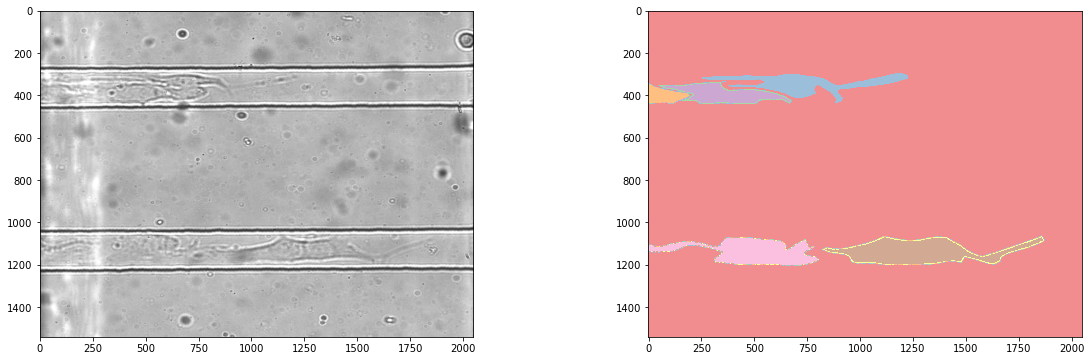

(1541, 2048)
(1541, 2048)


In [5]:
import tifffile as tiff
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
og_img = tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-M/01/t0007.tif")
#plt.imshow(og_img, cmap='gist_gray',alpha=0.9)

gt_mask=tiff.imread(f"/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-M/01_ST/SEG/man_seg0007.tif")
#plt.imshow(gt_mask, cmap='Set1',alpha=0.5)
ax[0].imshow(og_img, cmap='gist_gray',alpha=0.9)
ax[1].imshow(gt_mask,cmap='Set1', alpha=0.5)
plt.show()
print(og_img.shape)
print(gt_mask.shape)